![Vidi_Waterflux_Banner](https://raw.githubusercontent.com/ITC-Water-Resources/Vidi-waterflux-merch/refs/heads/main/jupyter/Vidi_Waterflux_Banner.png)
*Roelof Rietbroek, Sedigheh Karimi, Amin Shakya EGU 2025*

# Create overview plots to be put on the poster

In [1]:
%load_ext autoreload
%autoreload 2


In [14]:
import os
import geopandas as gpd
import pandas as pd

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from geoslurp import GeoslurpManager
from geoslurp.tools.xarray import *
import geoslurp.tools.pandas
import matplotlib as mpl



#local python tools
from common.config import read_config,add_alpha,get_background

In [16]:
get_background()

In [17]:
conf=read_config()
datadir=conf['dataroot']
mediadir=conf['mediaroot']

schema=conf['geoslurpschema']
basins_t="hydroshedbasins"

In [18]:
#load basins files
basinsgpkg=os.path.join(datadir,'hydroshed_csl03_gl_l021.gpkg')

gdfbasins=gpd.read_file(basinsgpkg)

gdfbasins.head()

,PFAF_ID,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,ENDO,COAST,ORDER,SORT,name,geometry
0,111,1030000010,0,1030000010,1030000010,0.0,0.0,236343.2,236343.2,0,1,0,1,SETIT,"MULTIPOLYGON (((39.76528 15.42917, 39.75492 15..."
1,112,1030003990,0,1030003990,1030003990,0.0,0.0,519027.5,519027.5,0,1,0,2,GULF OF ADEN/SOMALIA,"MULTIPOLYGON (((40.81528 14.75417, 40.79561 14..."
2,114,1030008100,0,1030008100,1030008100,0.0,0.0,797881.4,797881.4,0,0,1,3,SHEBELLE,"MULTIPOLYGON (((36.74167 4.06667, 36.74131 4.0..."
3,117,1030008110,0,1030008110,1030008110,0.0,0.0,1040194.7,1040194.7,0,1,0,4,RUFIJI,"MULTIPOLYGON (((40.84444 -2.43333, 40.83833 -2..."
4,122,1030011660,0,1030011660,1030011660,0.0,0.0,1378103.3,1378121.1,0,0,1,6,ZAMBEZI,"MULTIPOLYGON (((35.2625 -18.23333, 35.26215 -1..."


## Europe zone plot

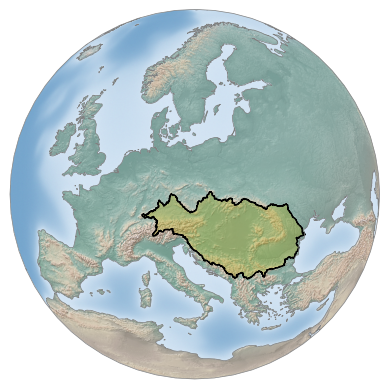

In [22]:
viewheight=1e6
feast_m=0
fnorth_m=0
eucrs=ccrs.NearsidePerspective(central_longitude=15.0, central_latitude=50.0, satellite_height=viewheight, false_easting=feast_m, false_northing=fnorth_m)
gdfbasins_eu=gdfbasins.to_crs(eucrs)

mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['axes.edgecolor'] = 'grey'

ax = plt.axes(projection=eucrs)

plotcombos={"DANUBE":{"edgecolor":'black','facecolor':add_alpha('#aaaa00',0.3)}}


for basin,props in plotcombos.items():
    ax.add_geometries(gdfbasins_eu[gdfbasins_eu.name==basin].geometry, crs=eucrs, **props)
# gdfbasins_eu.plot(ax=ax)
ax.background_img(name='HypsoReliefWater', resolution='high')
ax.coastlines(color='grey',lw=0.5)


feu_overview=os.path.join(mediadir,'EU_overview.svg')

plt.savefig(feu_overview,transparent=True)
plt.show()


## East Africa zone plot

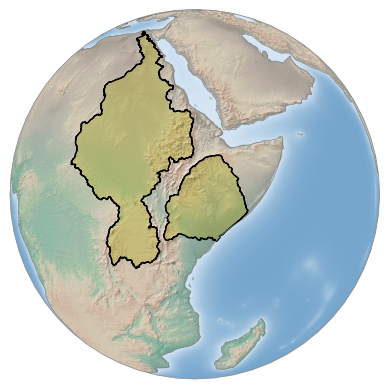

In [29]:
viewheight=2e6
feast_m=0
fnorth_m=0
afcrs=ccrs.NearsidePerspective(central_longitude=40.0, central_latitude=5.0, satellite_height=viewheight, false_easting=feast_m, false_northing=fnorth_m)
gdfbasins_af=gdfbasins.to_crs(afcrs)

mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['axes.edgecolor'] = 'grey'

ax = plt.axes(projection=afcrs)

plotcombos={"SHEBELLE":{"edgecolor":'black','facecolor':add_alpha('#aaaa00',0.3)},"NILE":{"edgecolor":'black','facecolor':add_alpha('#aaaa00',0.3)}}


for basin,props in plotcombos.items():
    ax.add_geometries(gdfbasins_af[gdfbasins_af.name==basin].geometry, crs=afcrs, **props)
# gdfbasins_eu.plot(ax=ax)
ax.background_img(name='HypsoReliefWater', resolution='high')
ax.coastlines(color='grey',lw=0.5)


faf_overview=os.path.join(mediadir,'AF_overview.svg')

plt.savefig(faf_overview,transparent=True)
plt.show()
